In [1]:
import sys
import os
my_path = os.path.dirname(os.getcwd())
sys.path.append(my_path)

from prev_ob_models.Birgiolas2020.isolated_cells import *
from neuron import h
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [7]:
cells = [GC1(), GC2(), GC3(), GC4(), GC5()]
amps = [0.06, 0, -0.02]

num_cells = len(cells)

Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.
Mechanisms already loaded from path: Mechanisms.  Aborting.


In [3]:
h.cvode_active(0)
delay = 200
dur = 700
h.tstop = 1000
h.celsius = 35
h.steps_per_ms = 10
h.dt = 1.0 / h.steps_per_ms

Text(0.5, 0, 'time (ms)')

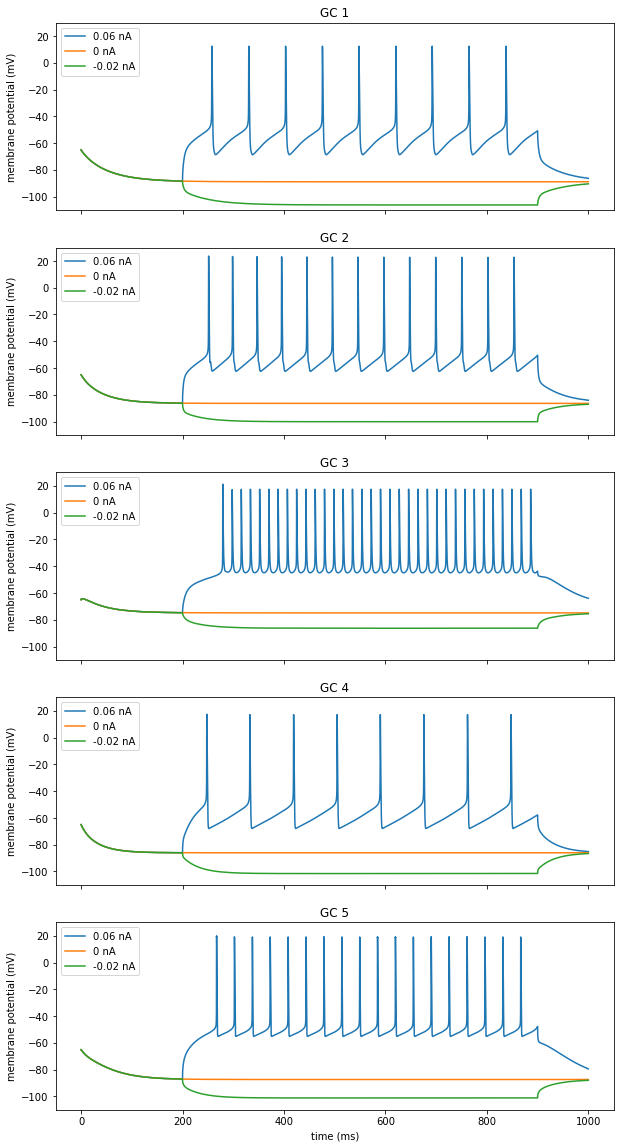

In [14]:
fig, axs = plt.subplots(num_cells, 1, figsize=(10,20), sharex=True)
axs = axs.ravel()

for idx, cell in enumerate(cells):
    for amp in amps:
        iclamp = h.IClamp(0.5, sec=cell.soma)
        iclamp.delay = delay
        iclamp.amp = amp
        iclamp.dur = dur

        t = h.Vector().record(h._ref_t)
        v = h.Vector().record(cell.soma(0.5)._ref_v)

        h.run()

        axs[idx].plot(t, v, label=f'{amp} nA')
    
    axs[idx].set_title(f'{cell.cell_type} {cell.cell_id}')

    axs[idx].legend(loc='upper left')
    axs[idx].set_ylim((-110,30))
    axs[idx].set_ylabel('membrane potential (mV)')

axs[num_cells-1].set_xlabel('time (ms)')